# Libraries

In [ ]:
# This library allows you to manipulate, simplify, and solve equations in Python
import sympy

# Now, let's design!
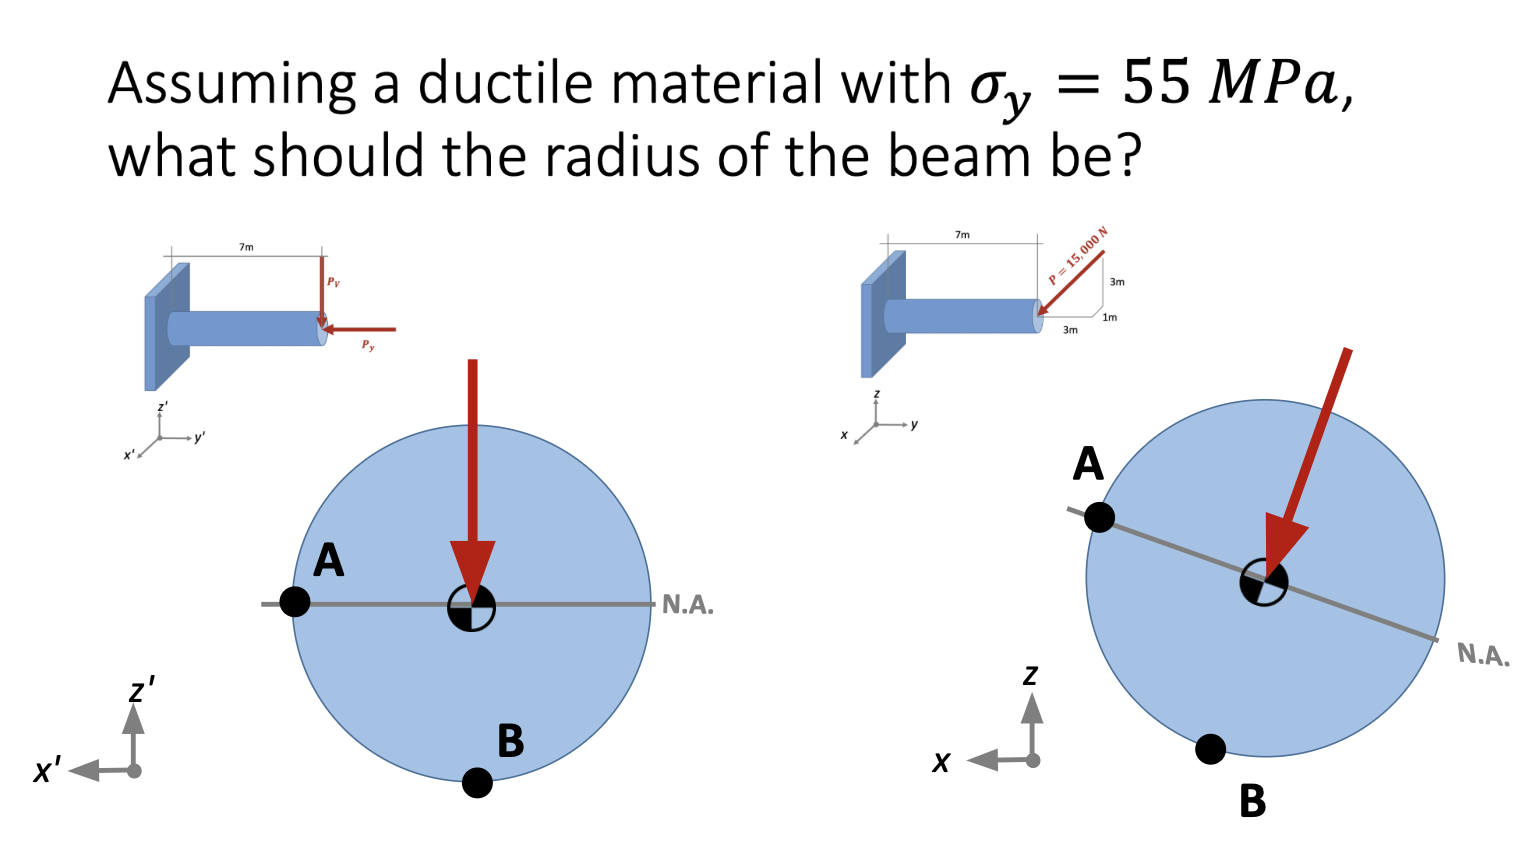

In [ ]:
# Parameters associated with the problem
actual_yield_strength = 55*10**6
actual_transverse_load = 10881
actual_axial_load = 10323
target_FOS = 2.0
actual_beam_length = 7.0

In [ ]:
# Define the variables that we'll need
factor_of_safety = sympy.symbols("FOS", real=True, positive=True)
axial_load = sympy.symbols("P_y", real=True, positive=True)
radius = sympy.symbols("r", real=True, positive=True)
transverse_load = sympy.symbols("P_V", real=True, positive=True)
yield_stress = sympy.symbols("sigma_y", real=True, positive=True)
length = sympy.symbols("L", real=True, positive=True)
axial_stress = sympy.symbols("sigma_axial", real=True, positive=True)
bending_stress = sympy.symbols("sigma_bending", real=True, positive=True)
shear_stress = sympy.symbols("tau_shear", real=True, positive=True)
combined_stress = sympy.symbols("tau_comb", real=True, positive=True)
transverse_load = sympy.symbols("P_V", real=True, positive=True)
moment_of_inertia = sympy.symbols("I", real=True, positive=True)
moment = sympy.symbols("M", real=True, positive=True)
z_evaluation = sympy.symbols("z", real=True, positive=True)

In [ ]:
# Start with the FOS equation
eqn = sympy.Eq(factor_of_safety, 0.5*yield_stress/combined_stress)
eqn

Eq(FOS, 0.5*sigma_y/tau_comb)

In [ ]:
# Substitute combined stress for combined shear equation
eqn = eqn.subs(combined_stress, sympy.sqrt((axial_stress+bending_stress)**2/4+shear_stress**2))
eqn

Eq(FOS, 0.5*sigma_y/sqrt(tau_shear**2 + (sigma_axial + sigma_bending)**2/4))

In [ ]:
# Substitute expression for axial stress
eqn = eqn.subs(axial_stress, axial_load/(sympy.pi*radius**2))
eqn

Eq(FOS, 0.5*sigma_y/sqrt(tau_shear**2 + (P_y/(pi*r**2) + sigma_bending)**2/4))

In [ ]:
# Substitute equation for shear
eqn = eqn.subs(shear_stress, 4*transverse_load/(3*sympy.pi*radius**4)*(radius**2-z_evaluation**2))
eqn

Eq(FOS, 0.5*sigma_y/sqrt(16*P_V**2*(r**2 - z**2)**2/(9*pi**2*r**8) + (P_y/(pi*r**2) + sigma_bending)**2/4))

In [ ]:
# Substitute expression for bending
eqn = eqn.subs(bending_stress, moment*z_evaluation/moment_of_inertia)
eqn

Eq(FOS, 0.5*sigma_y/sqrt(16*P_V**2*(r**2 - z**2)**2/(9*pi**2*r**8) + (P_y/(pi*r**2) + M*z/I)**2/4))

In [ ]:
# Substitute expression for MOI
eqn = eqn.subs(moment_of_inertia, sympy.pi*radius**4/4)
eqn

Eq(FOS, 0.5*sigma_y/sqrt(16*P_V**2*(r**2 - z**2)**2/(9*pi**2*r**8) + (4*M*z/(pi*r**4) + P_y/(pi*r**2))**2/4))

In [ ]:
# Substitute expression for moment
FOS_in_terms_of_z = sympy.simplify(eqn.subs(moment, transverse_load*length))
FOS_in_terms_of_z

Eq(FOS, 3.0*pi*r**4*sigma_y/sqrt(64*P_V**2*(r**2 - z**2)**2 + 9*(4*L*P_V*z + P_y*r**2)**2))

## Point A on the neutral axis (axial stress and shear stress)

In [ ]:
# Our evaluation point is on the neutral axis, so substitute that first and simplify.
FOS_for_A = sympy.simplify(FOS_in_terms_of_z.subs(z_evaluation, 0))
FOS_for_A

Eq(FOS, 3.0*pi*r**2*sigma_y/sqrt(64*P_V**2 + 9*P_y**2))

In [ ]:
# Solve and take a look at roots
values_from_problem = {
    axial_load: actual_axial_load,
    transverse_load: actual_transverse_load,
    yield_stress: actual_yield_strength,
    factor_of_safety: target_FOS,
}
for r_eqn in sympy.solve(FOS_for_A, radius):
    print(r_eqn.subs(values_from_problem).evalf())

0.0188806613109046


In [ ]:
# Get expression for the positive, real root
sympy.Eq(radius, sympy.solve(FOS_for_A, radius)[0])

Eq(r, 0.921317731923561*sqrt(FOS)*(P_V**2 + 0.140625*P_y**2)**(1/4)/sqrt(sigma_y))

## Point B (axial stress and bending stress)

In [ ]:
# Let's come back to our earlier equation
FOS_in_terms_of_z

Eq(FOS, 3.0*pi*r**4*sigma_y/sqrt(64*P_V**2*(r**2 - z**2)**2 + 9*(4*L*P_V*z + P_y*r**2)**2))

In [ ]:
# Our evaluation point is at the radius, so substitute that first and simplify.
FOS_for_B = sympy.simplify(FOS_in_terms_of_z.subs(z_evaluation, radius))
FOS_for_B

Eq(FOS, 1.0*pi*r**3*sigma_y/(4*L*P_V + P_y*r))

In [ ]:
# Solve and take a look at roots
values_from_problem = {
    axial_load: actual_axial_load,
    transverse_load: actual_transverse_load,
    yield_stress: actual_yield_strength,
    factor_of_safety: target_FOS,
    length: actual_beam_length,
}
for r_eqn in sympy.solve(FOS_for_B, radius):
    print(r_eqn.subs(values_from_problem).evalf())

0.152473389150103
-0.0762366945750513 + 0.131592602586042*I
-0.0762366945750513 - 0.131592602586042*I


In [ ]:
# Get expression for the positive, real root
sympy.Eq(radius, sympy.solve(FOS_for_B, radius)[0])

Eq(r, 0.123339494717893*FOS*P_y/(sigma_y*(FOS*L*P_V/sigma_y + (-0.00294731376096103*FOS**3*P_y**3/sigma_y**3 + FOS**2*L**2*P_V**2/sigma_y**2)**0.5)**(1/3)) + 0.8602540138281*(FOS*L*P_V/sigma_y + (-0.00294731376096103*FOS**3*P_y**3/sigma_y**3 + FOS**2*L**2*P_V**2/sigma_y**2)**0.5)**(1/3))